[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/kadenze-deeplearning-creative-applications/blob/master/Kadenze_Session_4.ipynb)

In [1]:
#!rm -rf ./*
!git clone https://github.com/JacksonIsaac/CADL.git
!mv CADL/session-4/* .

Cloning into 'CADL'...
remote: Counting objects: 2083, done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2083 (delta 1), reused 1 (delta 0), pack-reused 2074
Receiving objects: 100% (2083/2083), 322.73 MiB | 27.99 MiB/s, done.
Resolving deltas: 100% (1033/1033), done.


In [2]:
!pip uninstall -y matplotlib && pip install matplotlib==2.0.2
!apt-get install -y axel imagemagick

Uninstalling matplotlib-2.1.2:
  Successfully uninstalled matplotlib-2.1.2
    100% |████████████████████████████████| 14.6MB 2.2MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus fontconfig fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  hicolor-icon-theme imagemagick-6-common imagemagick-6.q16 libapparmor1
  libavahi-client3 libavahi-common-data libavahi-common3 libcairo2 libcups2
  libcupsfilters1 libcupsimage2 libdatrie1 libdbus-1-3 libdjvulibre-text
  libdjvulibre21 libfftw3-double3 libgraphite2-3 libgs9 libgs9-common
  libharfbuzz0b libijs-0.35 libilmbase12 libjbig0 libjbig2dec0 liblcms2-2
  liblqr-1-0 libltdl7 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libopenexr22 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpaper-utils libpaper1 libpixman-1-0
  libthai-data libthai0 libtiff5 libwmf0.2-7 libxcb-render0 

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import IPython.display as ipyd
from libs import gif, nb_utils

In [0]:
sess = tf.InteractiveSession()

In [0]:
from libs import inception

In [6]:
net = inception.get_inception_model()

In [7]:
!unzip inception5h.zip

Archive:  inception5h.zip
  inflating: imagenet_comp_graph_label_strings.txt  
  inflating: tensorflow_inception_graph.pb  
  inflating: LICENSE                 


In [0]:
tf.import_graph_def(net['graph_def'], name='inception')
g = tf.get_default_graph()

names = [op.name for op in g.get_operations()]

In [9]:
names

['inception/input',
 'inception/conv2d0_w',
 'inception/conv2d0_b',
 'inception/conv2d1_w',
 'inception/conv2d1_b',
 'inception/conv2d2_w',
 'inception/conv2d2_b',
 'inception/mixed3a_1x1_w',
 'inception/mixed3a_1x1_b',
 'inception/mixed3a_3x3_bottleneck_w',
 'inception/mixed3a_3x3_bottleneck_b',
 'inception/mixed3a_3x3_w',
 'inception/mixed3a_3x3_b',
 'inception/mixed3a_5x5_bottleneck_w',
 'inception/mixed3a_5x5_bottleneck_b',
 'inception/mixed3a_5x5_w',
 'inception/mixed3a_5x5_b',
 'inception/mixed3a_pool_reduce_w',
 'inception/mixed3a_pool_reduce_b',
 'inception/mixed3b_1x1_w',
 'inception/mixed3b_1x1_b',
 'inception/mixed3b_3x3_bottleneck_w',
 'inception/mixed3b_3x3_bottleneck_b',
 'inception/mixed3b_3x3_w',
 'inception/mixed3b_3x3_b',
 'inception/mixed3b_5x5_bottleneck_w',
 'inception/mixed3b_5x5_bottleneck_b',
 'inception/mixed3b_5x5_w',
 'inception/mixed3b_5x5_b',
 'inception/mixed3b_pool_reduce_w',
 'inception/mixed3b_pool_reduce_b',
 'inception/mixed4a_1x1_w',
 'inception/mixe

In [0]:
input_name = names[0] + ':0'

x = g.get_tensor_by_name(input_name)
softmax = g.get_tensor_by_name(names[-1] + ':0')

In [11]:
print(x)
print(softmax)

Tensor("inception/input:0", dtype=float32, device=/device:CPU:0)
Tensor("inception/output2:0", shape=(?, 1008), dtype=float32, device=/device:CPU:0)


In [0]:
#tf.test.gpu_device_name()

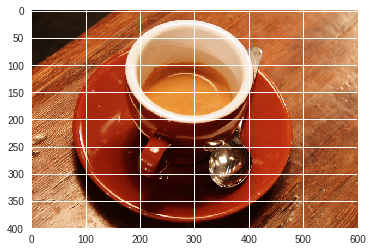

In [13]:
from skimage.data import coffee

og = coffee()
plt.imshow(og)

In [14]:
print(og.shape)
img = inception.preprocess(og)
print(img.shape)

img_4d = img[np.newaxis]
print(img_4d.shape)

(400, 600, 3)
(299, 299, 3)
(1, 299, 299, 3)


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


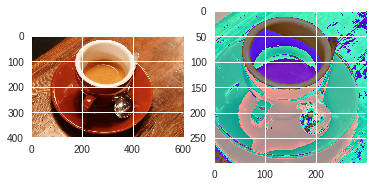

In [15]:
img = img.astype(np.uint8)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(og)
axs[1].imshow(img)

In [16]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))
print(res.shape)

(16, 1008)


In [0]:
res = np.mean(res, 0)
res = res / np.sum(res)

In [18]:
print([(res[idx], net['labels'][idx]) for idx in res.argsort()[-5:][::-1]])

[(0.998492, (947, 'espresso')), (0.00063125236, (859, 'cup')), (0.0005024138, (953, 'chocolate sauce')), (0.00019483188, (844, 'consomme')), (0.00013370324, (822, 'soup bowl'))]


In [19]:
W = g.get_tensor_by_name('inception/conv2d0_w:0')
W_eval = W.eval()
print(W_eval.shape)

(7, 7, 3, 64)


In [0]:
from libs import utils

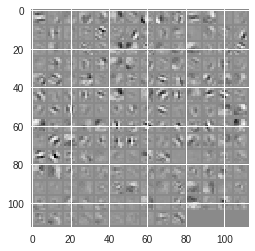

In [21]:
W_montage = utils.montage_filters(W_eval)
plt.figure()
plt.imshow(W_montage, interpolation='nearest')

In [0]:
Ws = [utils.montage_filters(W_eval[:, :, [i], :]) for i in range(3)]
Ws = np.rollaxis(np.array(Ws), 0, 3)

In [23]:
plt.figure()
plt.imshow(Ws, interpolation='nearest')

ValueError: ignored

In [24]:
np.min(Ws), np.max(Ws)

(-6.409200668334961, 6.334986209869385)

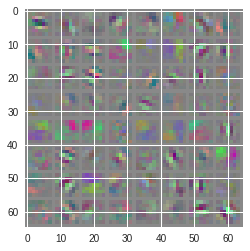

In [25]:
Ws = (Ws / np.max(np.abs(Ws)) * 128 + 128).astype(np.uint8)

plt.figure()
plt.imshow(Ws, interpolation='nearest')

In [0]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
layer_shape = tf.shape(feature).eval(feed_dict={x:img_4d})

In [27]:
print(layer_shape)

[  1 150 150  64]


Text(0.5,1,'Convolution Outputs')

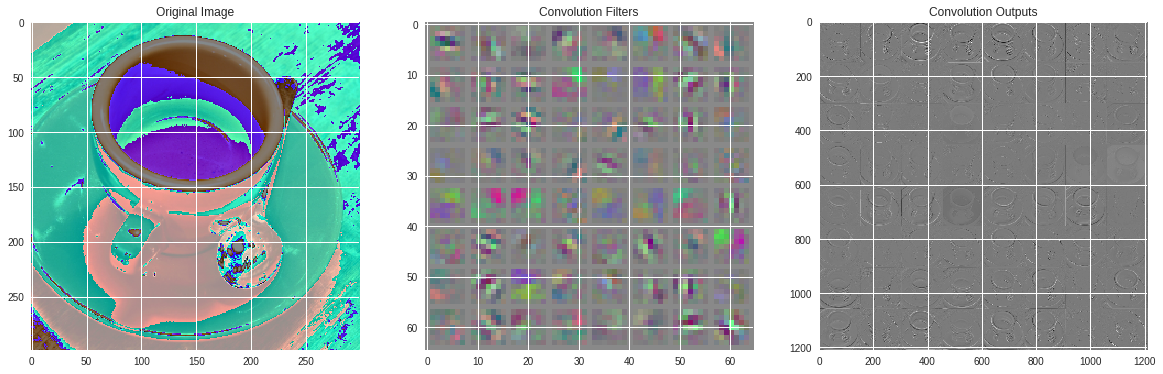

In [28]:
f = feature.eval(feed_dict={x:img_4d})
montage = utils.montage_filters(np.rollaxis(np.expand_dims(f[0], 3), 3, 2))

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(img.astype(np.uint8))
axs[0].set_title('Original Image')
axs[1].imshow(Ws, interpolation='nearest')
axs[1].set_title('Convolution Filters')
axs[2].imshow(montage, cmap='gray')
axs[2].set_title('Convolution Outputs')

In [29]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
gradient = tf.gradients(tf.reduce_max(feature, 3), x)

res = sess.run(gradient, feed_dict={x: img_4d})[0]

fig, axs = plt.subplots(1, 2)

axs[0].imshow(img.astype(np.uint8))
axs[1].imshow(res[0])

ValueError: ignored

In [0]:
def normalize(img, s=0.1):
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

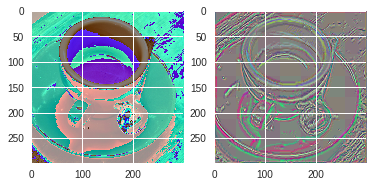

In [31]:
r = normalize(res)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(img.astype(np.uint8))
axs[1].imshow(r[0])

In [0]:
def compute_gradient(input_placeholder, img, layer_name, neuron_i):
    feature = g.get_tensor_by_name(layer_name)
    gradient = tf.gradients(tf.reduce_mean(feature[:, :, :, neuron_i]), x)
    res = sess.run(gradient, feed_dict={input_placeholder: img})[0]
    return res

def compute_gradients(input_placeholder, img, layer_name):
    feature = g.get_tensor_by_name(layer_name)
    layer_shape = tf.shape(feature).eval(feed_dict={input_placeholder: img})
    gradients = []
    for neuron_i in range(layer_shape[-1]):
        gradients.append(compute_gradient(input_placeholder, img, layer_name, neuron_i))
    return gradients

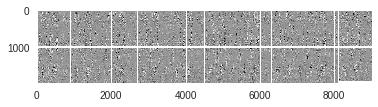

In [33]:
gradients = compute_gradients(x, img_4d, 'inception/conv2d1_pre_relu:0')
gradients_norm = [normalize(gradient_i[0]) for gradient_i in gradients]

montage = utils.montage_filters(np.array(gradients_norm))

plt.figure()
plt.imshow(montage)

In [34]:
features = [name for name in names if 'maxpool' in name.split('/')[-1]]
print(features)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


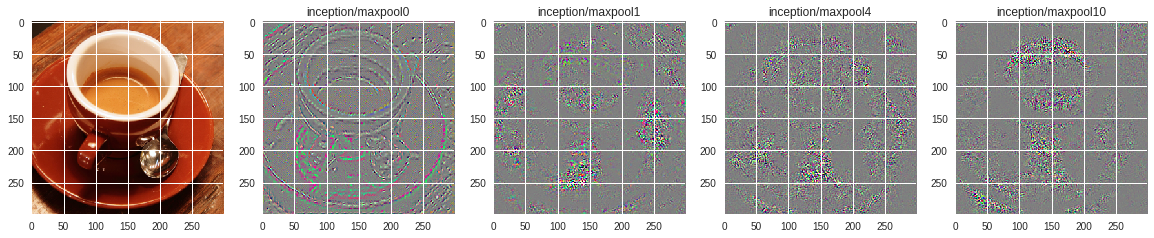

In [35]:
n_plots = len(features) + 1
fig, axs = plt.subplots(1, n_plots, figsize=(20, 5))
base = img_4d
axs[0].imshow(inception.deprocess(img))

for feature_i, featurename in enumerate(features):
    feature = g.get_tensor_by_name(featurename + ':0')
    neuron = tf.reduce_max(feature, len(feature.get_shape())-1)
    gradient = tf.gradients(tf.reduce_sum(neuron), x)
    this_res = sess.run(gradient[0], feed_dict={x: base})[0]
    axs[feature_i+1].imshow(normalize(this_res))
    axs[feature_i+1].set_title(featurename)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


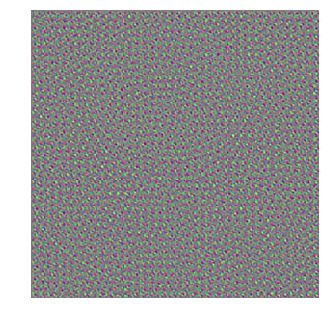

In [37]:
img_4d = img_4d / np.max(img_4d)

layer = g.get_tensor_by_name('inception/maxpool0:0')

gradient = tf.gradients(tf.reduce_mean(layer), x)

img_copy = img_4d.copy()

n_iterations = 200
step = 1.0

gif_step = 10

imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')

    # This will calculate the gradient of the layer we chose with respect to the input image.
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]

    # Let's normalize it by the maximum activation
    this_res /= (np.max(np.abs(this_res)) + 1e-8)

    # Then add it to the input image
    img_copy += this_res * step

    # And add to our gif
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

# Build the gif
gif.build_gif(imgs, saveto='1-simplest-mean-layer.gif')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


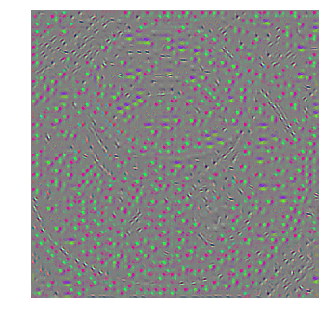

In [38]:
neuron = tf.reduce_max(layer, len(layer.get_shape()) - 1)
gradient = tf.gradients(tf.reduce_mean(neuron), x)

img_copy = img_4d.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
gif.build_gif(imgs, saveto='1-simplest-max-neuron.gif')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


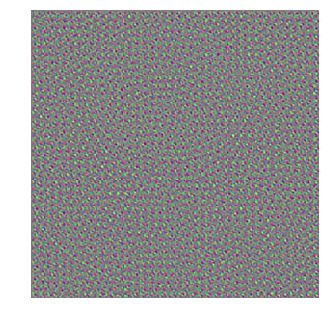

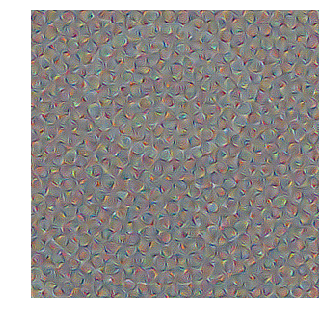

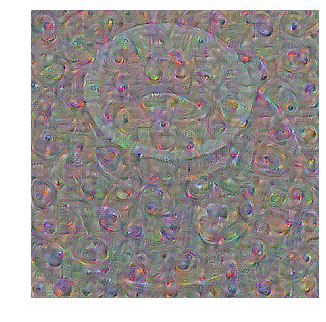

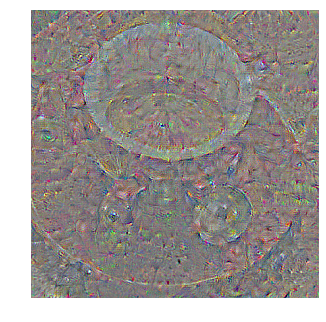

In [39]:
for feature_i in features:
    layer = g.get_tensor_by_name(feature_i + ':0')
    gradient = tf.gradients(tf.reduce_mean(layer), x)
    img_copy = img_4d.copy()
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    gif.build_gif(
        imgs, saveto='1-simplest-' + feature_i.split('/')[-1] + '.gif')

In [40]:
img_noise = inception.preprocess(
    (np.random.randint(100, 150, size=(299, 299, 3), dtype=np.uint8)))[np.newaxis]
print(img_noise.min(), img_noise.max())

-17.0 32.0


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


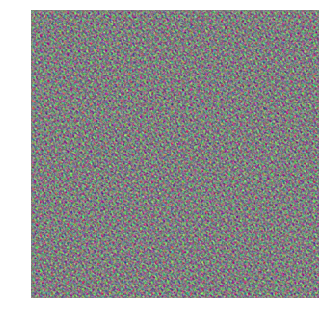

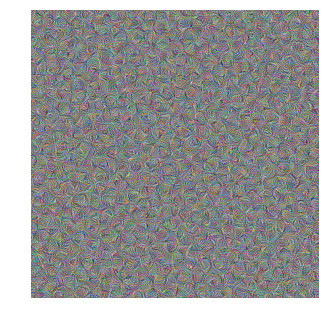

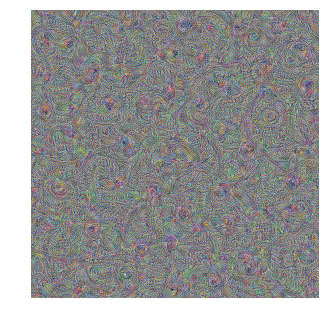

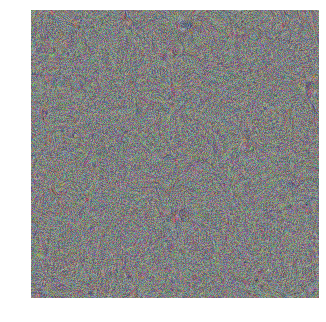

In [41]:
for feature_i in features:
    layer = g.get_tensor_by_name(feature_i + ':0')
    gradient = tf.gradients(tf.reduce_mean(layer), x)
    img_copy = img_noise.copy()
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    gif.build_gif(
        imgs, saveto='1-simplest-noise-' + feature_i.split('/')[-1] + '.gif')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


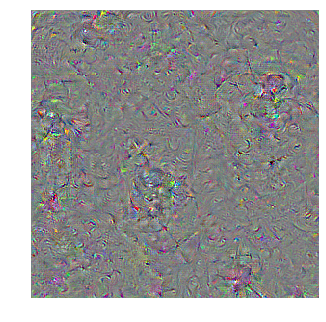

In [42]:
layer = g.get_tensor_by_name('inception/mixed5b_pool_reduce_pre_relu:0')

layer_shape = tf.shape(layer).eval(feed_dict={x:img_4d})

n_els = tf.shape(layer).eval(feed_dict={x:img_4d})[-1]

neuron_i = np.random.randint(n_els)

layer_vec = np.zeros(layer_shape)
layer_vec[..., neuron_i] = 1

neuron = tf.reduce_max(layer, len(layer.get_shape())-1)
gradient = tf.gradients(tf.reduce_mean(neuron), x)

neuron_i = np.random.randint(n_els)
layer_vec = np.zeros(layer_shape)
layer_vec[..., neuron_i] = 1
img_copy = img_noise.copy() / 255.0
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
gif.build_gif(imgs, saveto='2-objective-' + str(neuron_i) + '.gif')

In [43]:
net['labels']

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant'),
 (25, 'Weimaraner'),
 (26, 'soft-coated wheaten terrier'),
 (27, 'Dandie Dinmont'),
 (28, 'red wolf'),
 (29, 'Old English sheepdog'),
 (30, 'jaguar'),
 (31, 'otterhound'),
 (32, 'bloodhound'),
 (33, 'Airedale'),
 (34, 'hyena'),
 (35, 'meerkat'),
 (36, 'giant schnauzer'),
 (37, 'titi'),
 (38, 'three-toed sloth'),
 (39, 'sorrel'),
 (40, 'black-footed ferret'),
 (41, 'dalmatian'),
 (42, 'black-and-tan coonhound'),
 (43, 'papillon'),
 (44, 'skunk'),
 (45, 'Staffordsh

In [44]:
neuron_i = 755 # Necklace
print(net['labels'][neuron_i])

(755, 'necklace')


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


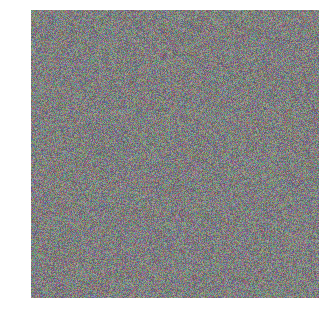

In [45]:
layer = g.get_tensor_by_name(names[-1] + ':0')
gradient = tf.gradients(tf.reduce_max(layer), x)

layer_shape = tf.shape(layer).eval(feed_dict={x: img_noise})
layer_vec = np.zeros(layer_shape)
layer_vec[..., neuron_i] = 1

gif_step = 10

img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
gif.build_gif(imgs, saveto='2-object-' + str(neuron_i) + '.gif')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


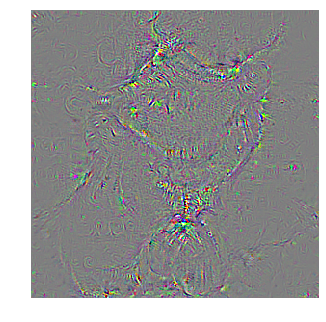

In [48]:
decay = 0.95

img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
gif.build_gif(imgs, saveto='3-decay-' + str(neuron_i) + '.gif')

In [0]:
from scipy.ndimage.filters import gaussian_filter

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


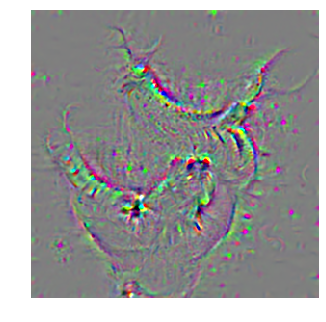

In [49]:
sigma = 1.0
blur_step = 5

img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay
    if it_i % blur_step == 0:
        for ch_i in range(3):
            img_copy[..., ch_i] = gaussian_filter(img_copy[..., ch_i], sigma)
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
gif.build_gif(imgs, saveto='4-gaussian-' + str(neuron_i) + '.gif')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


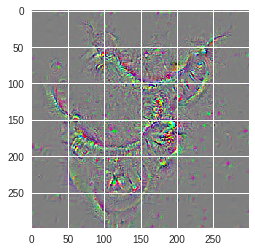

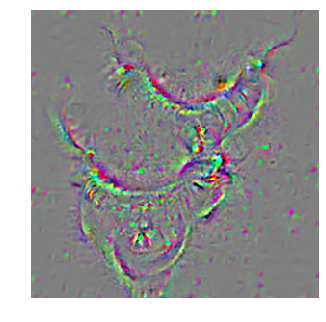

In [50]:
pth = 5
img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay
    if it_i % blur_step == 0:
        for ch_i in range(3):
            img_copy[..., ch_i] = gaussian_filter(img_copy[..., ch_i], sigma)

    mask = (abs(img_copy) < np.percentile(abs(img_copy), pth))
    img_copy = img_copy - img_copy*mask

    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

plt.imshow(normalize(img_copy[0]))
gif.build_gif(imgs, saveto='5-clip-' + str(neuron_i) + '.gif')

0, 

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:970: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  elif (not is_string_like(writer) and
/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py:1015: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(writer):


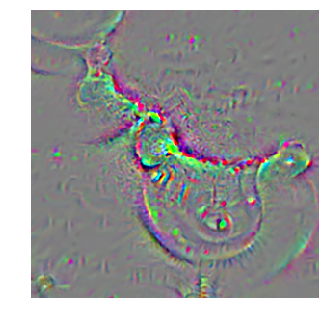

In [51]:
from skimage.transform import resize
img_copy = img_noise.copy()
crop = 1
n_iterations = 1000
imgs = []
n_img, height, width, ch = img_copy.shape
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay

    if it_i % blur_step == 0:
        for ch_i in range(3):
            img_copy[..., ch_i] = gaussian_filter(img_copy[..., ch_i], sigma)

    mask = (abs(img_copy) < np.percentile(abs(img_copy), pth))
    img_copy = img_copy - img_copy * mask

    # Crop a 1 pixel border from height and width
    img_copy = img_copy[:, crop:-crop, crop:-crop, :]

    # Resize (Note: in the lecture, we used scipy's resize which
    # could not resize images outside of 0-1 range, and so we had
    # to store the image ranges.  This is a much simpler resize
    # method that allows us to `preserve_range`.)
    img_copy = resize(img_copy[0], (height, width), order=3,
                 clip=False, preserve_range=True
                 )[np.newaxis].astype(np.float32)

    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

gif.build_gif(imgs, saveto='6-fractal.gif')